# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (5,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from yellowbrick.classifier import ClassPredictionError, ROCAUC

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer 
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_m = pd.read_csv('ANSUR II MALE Public.csv',encoding='latin-1')
df_f = pd.read_csv('ANSUR II FEMALE Public.csv')

In [3]:
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [4]:
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [5]:
df_f.shape,df_m.shape

((1986, 108), (4082, 108))

In [6]:
print(df_f.info())
print("\n")
print(df_m.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB
None


In [7]:
df_f = df_f.rename(columns = {"SubjectId":"subjectid"})

In [8]:
df = pd.concat([df_m,df_f])

In [9]:
df.shape

(6068, 108)

In [10]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [12]:
df.isnull().sum().any()

True

In [13]:
df.duplicated().sum()

0

In [14]:
missing_features = df.columns[df.isnull().any()]
for feature in missing_features:
    missing_count = df[feature].isnull().sum()
    print(f"{feature}: {missing_count} eksik değer")

Ethnicity: 4647 eksik değer


In [15]:
df = df.drop(columns=missing_features, axis=1)

In [16]:
df.isnull().sum().any()

False

In [17]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
1981,3,3
1982,3,3
1983,2,2
1984,3,3


In [18]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

In [19]:
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [20]:
df = df[df["DODRace"].isin([1,2,3])]
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [21]:
df.drop(["Weightlbs"], axis = 1, inplace=True)

In [22]:
df.drop(["Heightin"], axis = 1, inplace=True)

In [23]:
for columns in df.select_dtypes(exclude=[np.number]).columns:
    print(f"{columns} : {df[columns].nunique()} unique value")

Gender : 2 unique value
Date : 253 unique value
Installation : 12 unique value
Component : 3 unique value
Branch : 3 unique value
PrimaryMOS : 281 unique value
SubjectsBirthLocation : 136 unique value
WritingPreference : 3 unique value


In [24]:
drop_list_nonnumeric = ["Date", "Installation","PrimaryMOS"]
df.drop(drop_list_nonnumeric, axis=1, inplace=True)

In [25]:
df.drop("subjectid", axis = 1, inplace = True)

In [26]:
df.shape

(5769, 100)

In [27]:
df_temp = df.corr()

count = "done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(f"multicolinearity alert in between {col} - {i}")
print("Number of strong corelated features:", count)

multicolinearity alert in between abdominalextensiondepthsitting - waistcircumference
multicolinearity alert in between abdominalextensiondepthsitting - waistdepth
multicolinearity alert in between acromialheight - axillaheight
multicolinearity alert in between acromialheight - cervicaleheight
multicolinearity alert in between acromialheight - chestheight
multicolinearity alert in between acromialheight - iliocristaleheight
multicolinearity alert in between acromialheight - kneeheightsitting
multicolinearity alert in between acromialheight - stature
multicolinearity alert in between acromialheight - suprasternaleheight
multicolinearity alert in between acromialheight - tenthribheight
multicolinearity alert in between acromialheight - waistheightomphalion
multicolinearity alert in between acromialheight - wristheight
multicolinearity alert in between acromionradialelength - shoulderelbowlength
multicolinearity alert in between acromionradialelength - sleeveoutseam
multicolinearity alert

In [28]:
df_col = pd.DataFrame([feature, collinear], index=["feature","collinear"]).T
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
...,...,...
281,weightkg,chestcircumference
282,weightkg,verticaltrunkcircumferenceusa
283,wristcircumference,handcircumference
284,wristheight,acromialheight


In [29]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
axillaheight                      14
waistheightomphalion              14
crotchheight                      14
cervicaleheight                   14
kneeheightmidpatella              12
suprasternaleheight               12
chestheight                       11
tibialheight                      11
acromialheight                    10
poplitealheight                   10
span                               9
trochanterionheight                9
stature                            9
lateralfemoralepicondyleheight     7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
shoulderelbowlength                3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth                   3
weightkg                           3
forearmcenterofgriplength     

In [30]:
df["DODRace"] = df.DODRace.map({1 : 2, 2 : 1, 3 : 0})
df.DODRace.value_counts()

2    3792
1    1298
0     679
Name: DODRace, dtype: int64

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [31]:
X= df.drop("DODRace",axis=1)
y= df.DODRace

In [32]:
cat = X.select_dtypes("object").columns
cat

Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object')

In [33]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head(20)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,1054,815,175,853,1.0,2.0,0.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,...,1054,726,167,815,1.0,2.0,2.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,...,1041,929,180,831,1.0,2.0,2.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,...,968,794,176,793,1.0,2.0,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,...,1245,946,188,954,1.0,2.0,1.0,90.0,21,2.0
5,263,1407,344,216,1293,228,184,404,340,262,...,1020,802,171,802,1.0,2.0,1.0,65.0,39,2.0
6,314,1476,343,257,1378,280,207,453,452,271,...,1082,1162,195,861,1.0,2.0,1.0,76.0,32,2.0
7,304,1529,360,254,1402,247,206,425,332,282,...,1110,954,185,883,1.0,2.0,1.0,104.0,23,2.0
8,321,1457,339,230,1345,257,198,415,379,279,...,1033,995,191,881,1.0,2.0,1.0,5.0,36,2.0
9,227,1481,345,233,1372,264,204,406,325,271,...,1091,702,179,880,1.0,2.0,2.0,71.0,23,1.0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify =y)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #scale fit işlemini sadece X_train uygulanır
X_test_scaled = scaler.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [36]:
log_model = LogisticRegression()

In [37]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

In [38]:
y_pred_test = log_model.predict(X_test_scaled)
y_pred_train = log_model.predict(X_train_scaled)

In [39]:
log_accuracy_test = accuracy_score(y_test, y_pred_test)
log_accuracy_train = accuracy_score(y_train, y_pred_train)

log_f1_test = f1_score(y_test, y_pred_test, average='macro')
log_f1_train = f1_score(y_train, y_pred_train, average='macro')

log_accuracy_test, log_accuracy_train, log_f1_test, log_f1_train

(0.8717504332755632,
 0.8959913326110509,
 0.7543781646448476,
 0.8014918144689872)

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 49  19  68]
 [ 10 233  17]
 [ 28   6 724]]
              precision    recall  f1-score   support

           0       0.56      0.36      0.44       136
           1       0.90      0.90      0.90       260
           2       0.89      0.96      0.92       758

    accuracy                           0.87      1154
   macro avg       0.79      0.74      0.75      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[ 234   45  264]
 [  19  969   50]
 [  68   34 2932]]
              precision    recall  f1-score   support

           0       0.73      0.43      0.54       543
           1       0.92      0.93      0.93      1038
           2       0.90      0.97      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.85      0.78      0.80      4615
weighted avg       0.89      0.90      0.89      4615



In [42]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.881257
test_precision_weighted    0.870219
test_recall_weighted       0.881257
test_f1_weighted           0.870984
dtype: float64

### Logistic Model GridsearchCV

* Lojistic Regression solver "liblenear" for small dataset

* __liblenear__ kucuk datasetlerinde iyi sonuclar verir. Dikkat edilmesi gereken husus; liblinear sadece __penalty="l1"__ ile calisir, yoksa hata verir.

In [43]:
log_model = LogisticRegression(max_iter=10000, random_state=42)

In [44]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight=['balanced', None]
solver = ['liblinear', 'sag', 'saga']

param_grid = {"penalty" : penalty,
             "C" : C,
             "class_weight": class_weight,
             "solver" : solver}

grid_model = GridSearchCV(estimator= log_model,
                          param_grid= param_grid,
                         cv = 5,
                         scoring = "recall",
                         n_jobs = -1) ## -1 Tüm işlemcileri buraya yönlendirmek için kullanılır.

In [45]:
#grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=10)

In [46]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='recall')

In [47]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [50]:
y_pred_test = grid_model.predict(X_test_scaled)
y_pred_train = grid_model.predict(X_train_scaled)

In [51]:
log_accuracy_test = accuracy_score(y_test, y_pred_test)
log_accuracy_train = accuracy_score(y_train, y_pred_train)

log_f1_test = f1_score(y_test, y_pred_test, average='macro')
log_f1_train = f1_score(y_train, y_pred_train, average='macro')

log_accuracy_test, log_accuracy_train, log_f1_test, log_f1_train

(0.8587521663778163,
 0.8795232936078007,
 0.7558448906034153,
 0.7956285445165404)

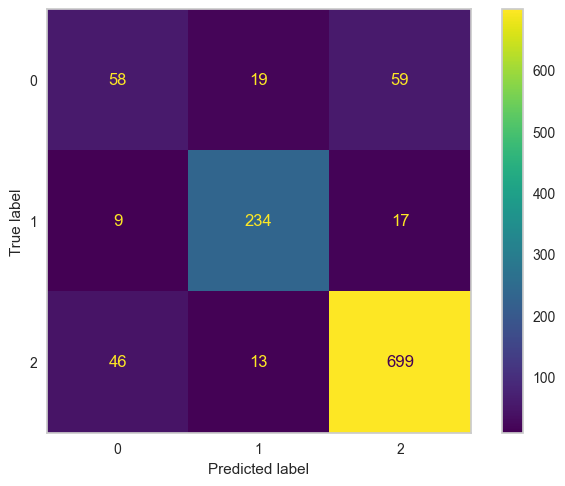

In [52]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.grid(None)
plt.show()

In [53]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 58  19  59]
 [  9 234  17]
 [ 46  13 699]]
              precision    recall  f1-score   support

           0       0.51      0.43      0.47       136
           1       0.88      0.90      0.89       260
           2       0.90      0.92      0.91       758

    accuracy                           0.86      1154
   macro avg       0.76      0.75      0.76      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[ 279   58  206]
 [  26  972   40]
 [ 161   65 2808]]
              precision    recall  f1-score   support

           0       0.60      0.51      0.55       543
           1       0.89      0.94      0.91      1038
           2       0.92      0.93      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.80      0.79      0.80      4615
weighted avg       0.87      0.88      0.88      4615



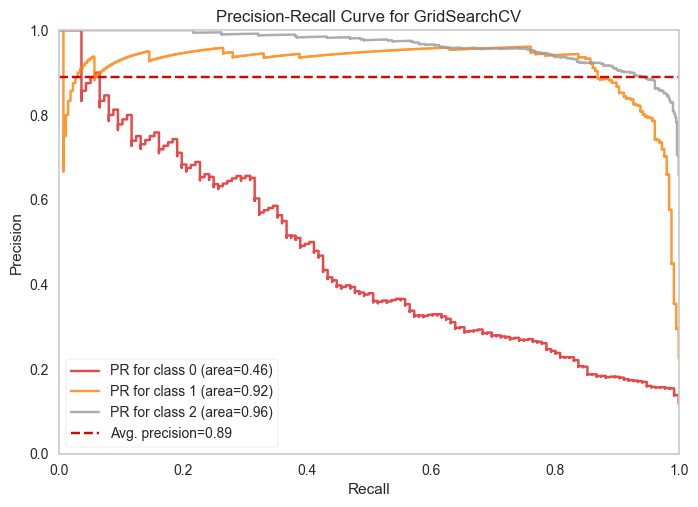

In [54]:
from yellowbrick.classifier import PrecisionRecallCurve
model = grid_model
viz = PrecisionRecallCurve(
    model,
    per_class=True,#buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

## 2. SVC

### Vanilla SVC model 

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin  class_weight düşünülmeli

In [55]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [56]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC(random_state=42))])

In [57]:
y_pred_test = pipe_model.predict(X_test)
y_pred_train = pipe_model.predict(X_train)

In [58]:
svc_accuracy_test = accuracy_score(y_test, y_pred_test)
svc_accuracy_train = accuracy_score(y_train, y_pred_train)

svc_f1_test = f1_score(y_test, y_pred_test, average='macro')
svc_f1_train = f1_score(y_train, y_pred_train, average='macro')

svc_accuracy_test, svc_accuracy_train, svc_f1_test, svc_f1_train

(0.8613518197573656,
 0.8983748645720476,
 0.6874792884557737,
 0.7730926847895642)

In [59]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 21  14 101]
 [  3 231  26]
 [  7   9 742]]
              precision    recall  f1-score   support

           0       0.68      0.15      0.25       136
           1       0.91      0.89      0.90       260
           2       0.85      0.98      0.91       758

    accuracy                           0.86      1154
   macro avg       0.81      0.67      0.69      1154
weighted avg       0.85      0.86      0.83      1154


Train_Set
[[ 158   39  346]
 [   8  975   55]
 [  10   11 3013]]
              precision    recall  f1-score   support

           0       0.90      0.29      0.44       543
           1       0.95      0.94      0.95      1038
           2       0.88      0.99      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.91      0.74      0.77      4615
weighted avg       0.90      0.90      0.88      4615



###  SVC Model GridsearchCV

In [60]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1], ## Pipe Model için nasıl verilmesi gerekiyorsa parametreleri o şekilde vermek lazım.
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear']}

In [61]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="recall", cv=10)

In [62]:
svm_model_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall')>

In [63]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall')

In [64]:
svm_model_grid.best_params_

{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

In [66]:
y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

In [68]:
svc_accuracy_test = accuracy_score(y_test, y_pred_test)
svc_accuracy_train = accuracy_score(y_train, y_pred_train)

svc_f1_test = f1_score(y_test, y_pred_test, average='macro')
svc_f1_train = f1_score(y_train, y_pred_train, average='macro')

svc_accuracy_test, svc_accuracy_train, svc_f1_test, svc_f1_train

(0.6568457538994801,
 0.657421451787649,
 0.26429567642956764,
 0.26443543818364057)

In [69]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[  0   0 136]
 [  0   0 260]
 [  0   0 758]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.00      0.00      0.00       260
           2       0.66      1.00      0.79       758

    accuracy                           0.66      1154
   macro avg       0.22      0.33      0.26      1154
weighted avg       0.43      0.66      0.52      1154


Train_Set
[[   0    0  543]
 [   0    0 1038]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       543
           1       0.00      0.00      0.00      1038
           2       0.66      1.00      0.79      3034

    accuracy                           0.66      4615
   macro avg       0.22      0.33      0.26      4615
weighted avg       0.43      0.66      0.52      4615



In [70]:
from yellowbrick.classifier import PrecisionRecallCurve
model = svm_model_grid
viz = PrecisionRecallCurve(
    model,
    per_class=True,#buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

KeyboardInterrupt: 

## 3. RF

### Vanilla RF Model

In [71]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [73]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.8240901213171578, 1.0, 0.6077579906941143, 1.0)

In [74]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[  9  16 111]
 [  0 193  67]
 [  3   6 749]]
              precision    recall  f1-score   support

           0      0.750     0.066     0.122       136
           1      0.898     0.742     0.813       260
           2      0.808     0.988     0.889       758

    accuracy                          0.824      1154
   macro avg      0.819     0.599     0.608      1154
weighted avg      0.821     0.824     0.781      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[ 543    0    0]
 [   0 1038    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       543
           1      1.000     1.000     1.000      1038
           2      1.000     1.000     1.000      3034

    accuracy                          1.000      4615
   macro avg      1.000     1.000     1.000      4615
weighted avg      1.000     1.000     1.000      4615



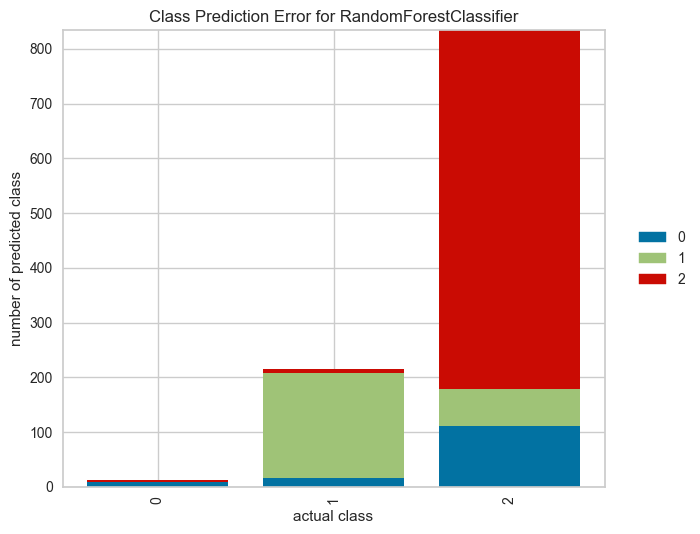

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [75]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### RF Model GridsearchCV

In [76]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

In [77]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [78]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 180,
 'n_estimators': 100}

In [79]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [80]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.8076256499133448,
 0.9007583965330445,
 0.5613994313231002,
 0.7874413715060337)

In [81]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[  2  22 112]
 [  1 188  71]
 [  0  16 742]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[ 170    5  368]
 [   0  954   84]
 [   0    1 3033]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0      0.667     0.015     0.029       136
           1      0.832     0.723     0.774       260
           2      0.802     0.979     0.882       758

    accuracy                          0.808      1154
   macro avg      0.767     0.572     0.561      1154
weighted avg      0.793     0.808     0.757      1154

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0      1.000     0.313     0.477       543
           1      0.994     0.919     0.955      1038
           2      0.870     1.000     0.931      3034

    accuracy                          0.901      4615
   macro avg  

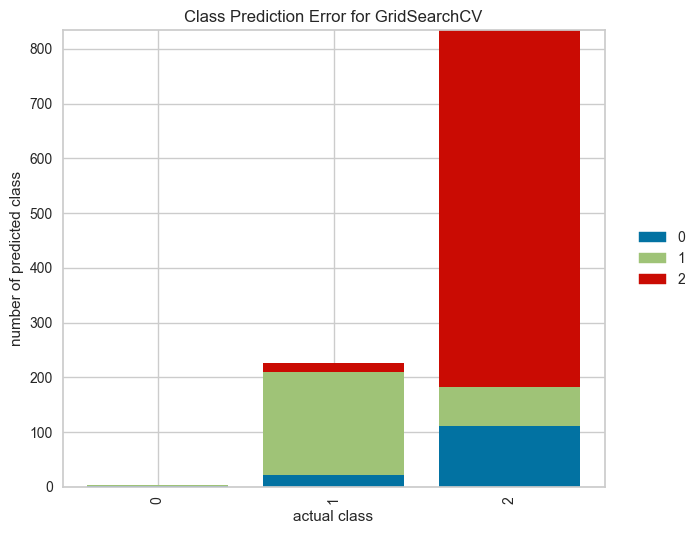

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [82]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

## 4. XGBoost

### Vanilla XGBoost Model

In [83]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

In [84]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[ 53  18  65]
 [  4 216  40]
 [  8   5 745]]
              precision    recall  f1-score   support

           0       0.82      0.39      0.53       136
           1       0.90      0.83      0.87       260
           2       0.88      0.98      0.93       758

    accuracy                           0.88      1154
   macro avg       0.87      0.73      0.77      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[ 543    0    0]
 [   0 1038    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [85]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [86]:
xgb_model = XGBClassifier(random_state=42)

In [87]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = make_scorer(precision_score,  average="macro", pos_label=1), verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [88]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1}

In [89]:
y_pred_test = xgb_grid.predict(X_test)
y_pred_train = xgb_grid.predict(X_train)

In [90]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.8838821490467937, 0.999133261105092, 0.7798721828468786, 0.9985481269335645)

In [91]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 52  16  68]
 [  2 220  38]
 [  5   5 748]]
              precision    recall  f1-score   support

           0       0.88      0.38      0.53       136
           1       0.91      0.85      0.88       260
           2       0.88      0.99      0.93       758

    accuracy                           0.88      1154
   macro avg       0.89      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[ 539    0    4]
 [   0 1038    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       543
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



## Comparing Models

### Accuracy Comparison

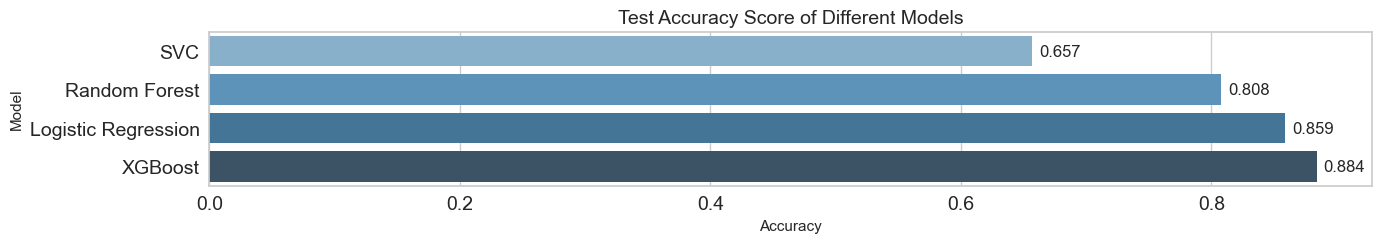

In [92]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVC", "Random Forest","XGBoost"],
                        "Accuracy": [log_accuracy_test, svc_accuracy_test, rfc_accuracy_test, xgb_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14);

### F1 Score Comparison

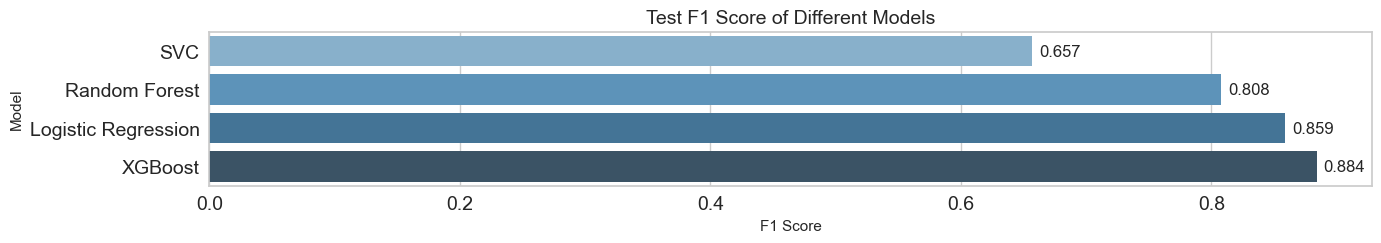

In [95]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVC", "Random Forest","XGBoost"],
                        "F1 Score": [log_accuracy_test, svc_accuracy_test, rfc_accuracy_test, xgb_accuracy_test]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14);

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [96]:
scaler = StandardScaler().fit(X)

In [97]:
import pickle # Modeli kaydetmek için kullanılır.

In [98]:
pickle.dump(scaler, open("scaler_SoldierRace", "wb"))

In [99]:
X_scaled = scaler.transform(X)

In [100]:
final_model = XGBClassifier().fit(X_scaled, y)

In [101]:
pickle.dump(final_model, open("final_model_SoldierRace", 'wb')) #transform ve fit ettiğimiz X datayı final olarak kayıt edilir.

In [102]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
...,...,...,...,...,...,...,...,...
Component,5769.0,1.060322,0.980126,0.0,0.0,2.0,2.0,2.0
Branch,5769.0,0.953545,0.688668,0.0,0.0,1.0,1.0,2.0
SubjectsBirthLocation,5769.0,71.718495,35.329921,0.0,48.0,75.0,93.0,135.0
Age,5769.0,29.776391,8.706610,17.0,23.0,28.0,36.0,58.0


## Altta yazılı olan başlıklar ile ilgili domain knowledge yapılarak çözüme gelinmeli

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Yukaridaki makale Smote islemini detayli bir sekilde anlatiyor. 

##  Smote implement

__Smote__ -----> Dengesiz data setlerinde datadaki en buyuk gozlem sayisi hangi class' a ait ise diger class' larin gozlem sayisini da ona esitler. Mesela datamizdaki en buyuk gozlem sayisi White = 3034 idi. Smote islemi uygulandiginda diger class' lardaki gozlem sayilari da buna esitlenir. Dengesiz datasetlerinde mutlaka denenmelidir :

In [103]:
#%pip install imbalanced-learn

     -------------------------------------- 235.6/235.6 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
# check version number
import imblearn
print(imblearn.__version__)

0.11.0


In [105]:
y_train.value_counts()

2    3034
1    1038
0     543
Name: DODRace, dtype: int64

In [106]:
# Oversample and plot imbalanced dataset with SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [107]:
over1 = SMOTE(sampling_strategy={1:3034})
X_train_resampled_over, y_train_resampled_over = over1.fit_resample(X_train, y_train)

# Apply under-sampling (RandomUnderSampler)
over2 = SMOTE(sampling_strategy={0:3034})
X_train_resampled, y_train_resampled = over2.fit_resample(X_train_resampled_over, y_train_resampled_over)

# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),
    ("XGBoost", XGBClassifier())
]

# Create the pipeline
xgb_pipe = Pipeline(steps=steps)

# Fit the pipeline on the resampled training data
xgb_pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBoost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [108]:
y_train_resampled.value_counts()

2    3034
1    3034
0    3034
Name: DODRace, dtype: int64

In [109]:
eval_metric(xgb_pipe, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[ 44  16  76]
 [  8 217  35]
 [ 14   9 735]]
              precision    recall  f1-score   support

           0       0.67      0.32      0.44       136
           1       0.90      0.83      0.86       260
           2       0.87      0.97      0.92       758

    accuracy                           0.86      1154
   macro avg       0.81      0.71      0.74      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[3034    0    0]
 [   0 3034    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      9102
   macro avg       1.00      1.00      1.00      9102
weighted avg       1.00      1.00      1.00      9102



## Random Search

In [113]:
from sklearn.model_selection import RandomizedSearchCV

# Define scoring metric
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

# Create SMOTE resampler
over1 = SMOTE(sampling_strategy={1: 3034})
X_train_resampled_over, y_train_resampled_over = over1.fit_resample(X_train, y_train)

# Define pipeline steps
operations = [("scaler", StandardScaler()), ("XGBoost", XGBClassifier(max_iter=1000))]

# Create pipeline
xgb_pipe = Pipeline(steps=operations)

# Define hyperparameter distributions
distributions = {
    "XGBoost__learning_rate": [0.01, 0.1, 0.2],
    "XGBoost__n_estimators": [100, 200, 300],
    "XGBoost__max_depth": [3, 4, 5],
    # ... other hyperparameters
}

# Create RandomizedSearchCV model
grid_model = RandomizedSearchCV(xgb_pipe, distributions, scoring=f1_Hispanic, cv=10)
grid_model.fit(X_train_resampled_over, y_train_resampled_over)


[00:54:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:54:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:54:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:54:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:54:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:54:37]

[00:55:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:55:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:56:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:56:07]

[00:58:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:58:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:58:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:58:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:58:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[00:58:58]

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('XGBoost',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            importa...
                                                            max_depth=None,
                                                            max_iter=1000,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None, ...))]),
                   param_distributions={'XGBoost__learning_rate': [0.01, 0.1,
                                                                   0.2],
                                        'XGBoost__max_depth': [3, 4, 5],
                                        'XGBoost__n_estimators': [100, 200,
                                                                  300]},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [114]:
eval_metric(grid_model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[ 53  18  65]
 [  4 228  28]
 [  5  10 743]]
              precision    recall  f1-score   support

           0       0.85      0.39      0.54       136
           1       0.89      0.88      0.88       260
           2       0.89      0.98      0.93       758

    accuracy                           0.89      1154
   macro avg       0.88      0.75      0.78      1154
weighted avg       0.89      0.89      0.87      1154


Train_Set
[[1989  332  713]
 [   0 3033    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      0.66      0.79      3034
           1       0.90      1.00      0.95      3034
           2       0.81      1.00      0.89      3034

    accuracy                           0.89      9102
   macro avg       0.90      0.89      0.88      9102
weighted avg       0.90      0.89      0.88      9102



## Logistic Regression Over/Under Sampling

In [115]:
over = SMOTE(sampling_strategy={0:1038})
X_train_resampled_over, y_train_resampled_over = over.fit_resample(X_train, y_train)

# Apply under-sampling (RandomUnderSampler)
under = RandomUnderSampler(sampling_strategy={2:1038})
X_train_resampled, y_train_resampled = under.fit_resample(X_train_resampled_over, y_train_resampled_over)

# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),
    ("XGBoost", XGBClassifier())
]

# Create the pipeline
xgb_pipe = Pipeline(steps=steps)

# Fit the pipeline on the resampled training data
xgb_pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBoost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [116]:
y_train_resampled.value_counts()

0    1038
1    1038
2    1038
Name: DODRace, dtype: int64

In [118]:
eval_metric(xgb_pipe, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[ 83  22  31]
 [ 13 233  14]
 [ 73  26 659]]
              precision    recall  f1-score   support

           0       0.49      0.61      0.54       136
           1       0.83      0.90      0.86       260
           2       0.94      0.87      0.90       758

    accuracy                           0.84      1154
   macro avg       0.75      0.79      0.77      1154
weighted avg       0.86      0.84      0.85      1154


Train_Set
[[1038    0    0]
 [   0 1038    0]
 [   0    0 1038]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00      1038

    accuracy                           1.00      3114
   macro avg       1.00      1.00      1.00      3114
weighted avg       1.00      1.00      1.00      3114



# Grid Search

In [119]:
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

# Create SMOTE and RandomUnderSampler resamplers
over = SMOTE(sampling_strategy={0: 1040})
X_train_resampled_over, y_train_resampled_over = over.fit_resample(X_train, y_train)

under = RandomUnderSampler(sampling_strategy={2: 1040})
X_train_resampled, y_train_resampled = under.fit_resample(X_train_resampled_over, y_train_resampled_over)

# Define pipeline steps
operations = [("scaler", StandardScaler()), ("XGBoost", XGBClassifier(max_iter=1000))]

# Create pipeline
xgb_pipe = Pipeline(steps=operations)

# Define hyperparameter distributions for XGBoost
distributions = {
    "XGBoost__learning_rate": [0.01, 0.1, 0.2],
    "XGBoost__n_estimators": [100, 200, 300],
    "XGBoost__max_depth": [3, 4, 5],
    # ... other hyperparameters specific to XGBoost
}

# Create RandomizedSearchCV model for XGBoost
grid_model = RandomizedSearchCV(xgb_pipe, distributions, scoring=f1_Hispanic, cv=10)
grid_model.fit(X_train_resampled, y_train_resampled)

[01:02:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:02:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:02:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:02:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:02:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:02:45]

[01:03:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:03:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:03:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:03:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:03:41]

[01:04:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:04:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:04:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:04:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:04:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_iter" } are not used.

[01:04:53]

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('XGBoost',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            importa...
                                                            max_depth=None,
                                                            max_iter=1000,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None, ...))]),
                   param_distributions={'XGBoost__learning_rate': [0.01, 0.1,
                                                                   0.2],
                                        'XGBoost__max_depth': [3, 4, 5],
                                        'XGBoost__n_estimators': [100, 200,
                                                                  300]},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [120]:
eval_metric(grid_model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[ 87  17  32]
 [ 14 234  12]
 [ 89  31 638]]
              precision    recall  f1-score   support

           0       0.46      0.64      0.53       136
           1       0.83      0.90      0.86       260
           2       0.94      0.84      0.89       758

    accuracy                           0.83      1154
   macro avg       0.74      0.79      0.76      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[1040    0    0]
 [   0 1038    0]
 [   0    0 1040]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00      1040

    accuracy                           1.00      3118
   macro avg       1.00      1.00      1.00      3118
weighted avg       1.00      1.00      1.00      3118



#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [122]:
#pip install shap

     -------------------------------------- 462.3/462.3 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 27.7/27.7 MB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
import shap

model = LogisticRegression(random_state=101)
model.fit(X_train, y_train)  # Train the model

explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_train)

Permutation explainer: 4616it [03:01, 24.37it/s]                                                                       


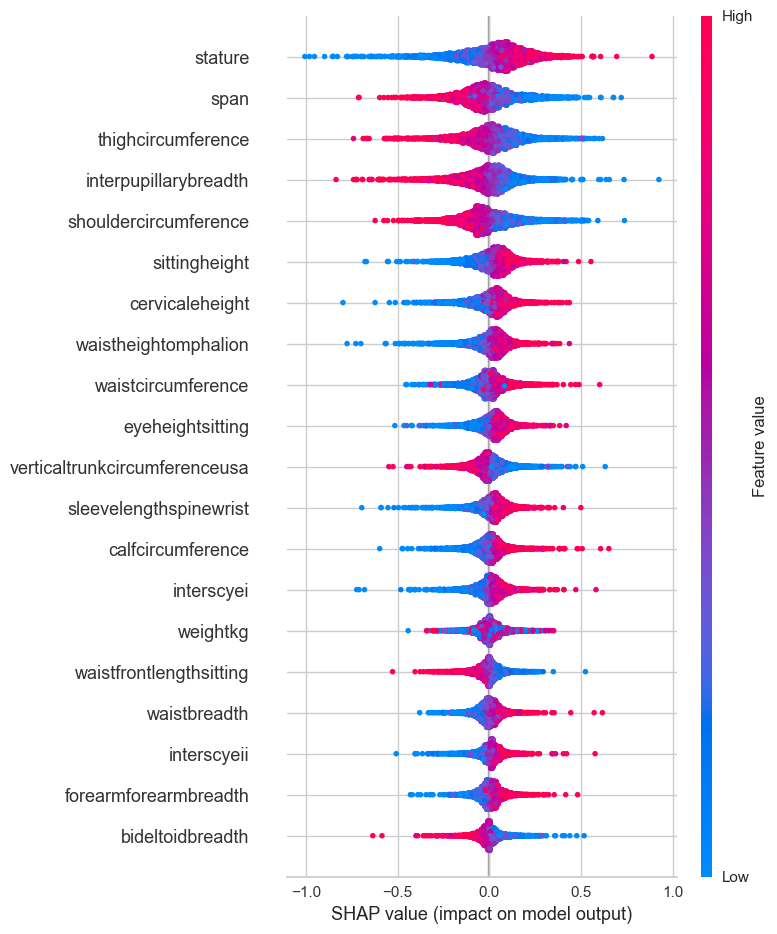

In [124]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

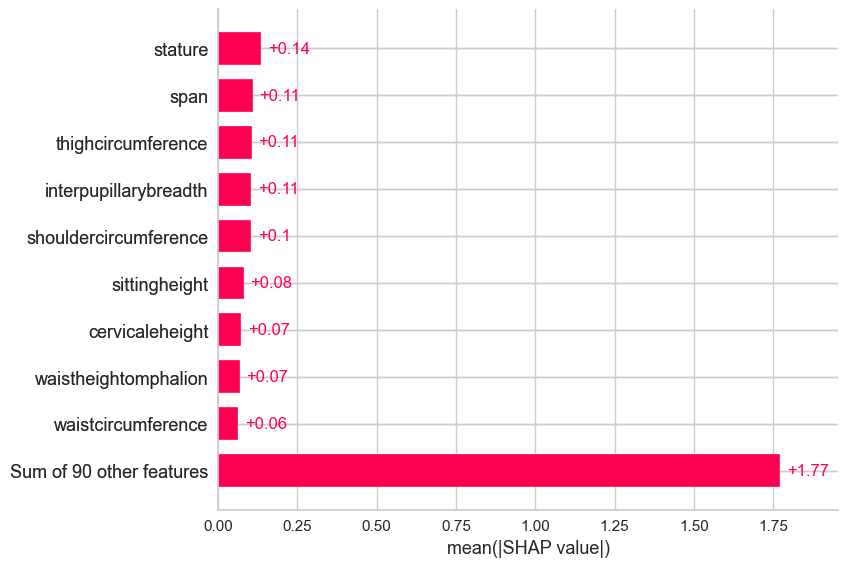

In [125]:
shap.plots.bar(shap_values)

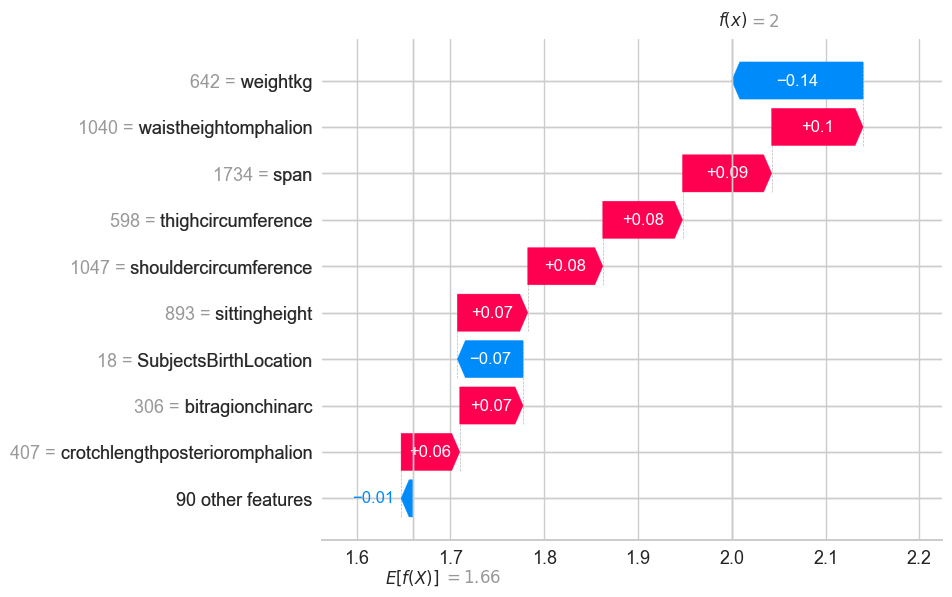

In [126]:
shap.plots.waterfall(shap_values[0])

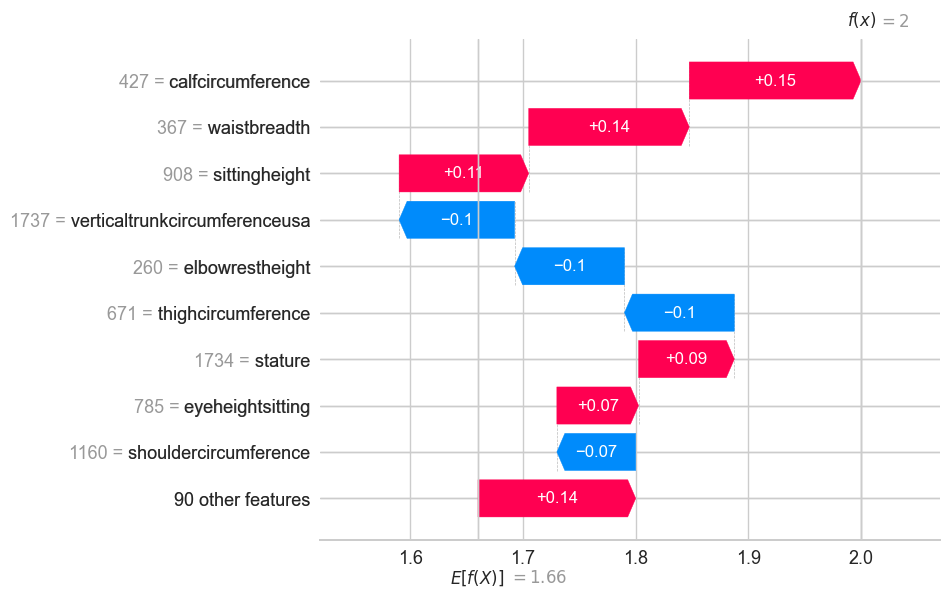

In [127]:
shap.plots.waterfall(shap_values[1])

In [128]:
y_train.value_counts().sum()

4615

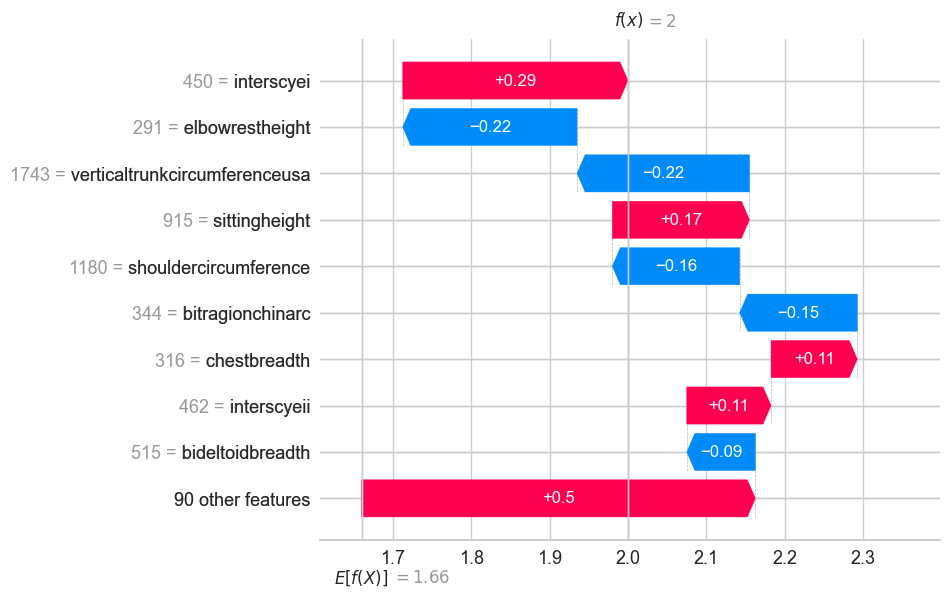

In [129]:
shap.plots.waterfall(shap_values[4614])